# Import Statements

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("darkgrid")
sns.set(font_scale = 1.3)

imported successfully

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

dataset loaded successfully

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Univariate Analysis

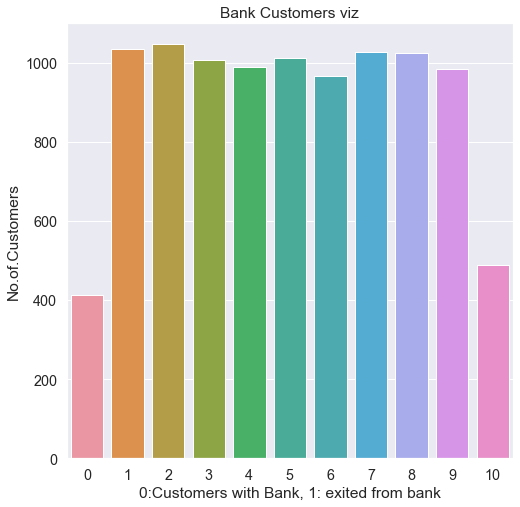

In [6]:
plt.figure(figsize=(8,8))
sns.countplot(x='Tenure',data=df)
plt.xlabel('0:Customers with Bank, 1: exited from bank')
plt.ylabel('No.of.Customers')
plt.title("Bank Customers viz")
plt.show()

<AxesSubplot:xlabel='Balance', ylabel='Density'>

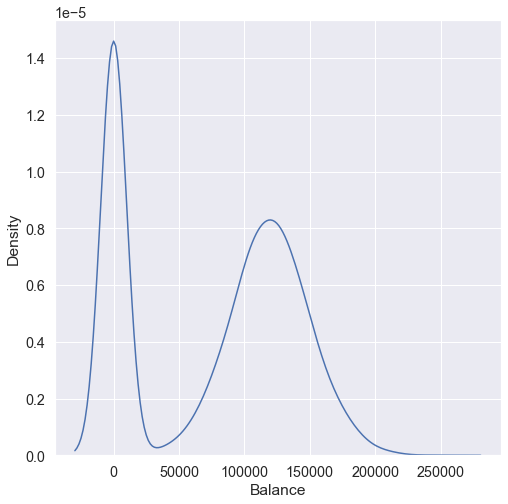

In [7]:
plt.figure(figsize=(8,8))
sns.kdeplot(x=df["Balance"])

## Bi - Variate Analysis

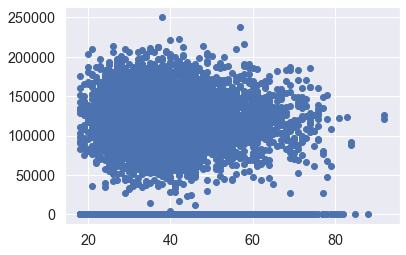

In [8]:
plt.scatter(df.Age,df.Balance)

In [9]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [10]:
import statsmodels.api as sm

#define response variable
y = df["CreditScore"]

#define explanatory variable
x = df[["EstimatedSalary"]]

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            CreditScore   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01916
Date:                Wed, 28 Sep 2022   Prob (F-statistic):              0.890
Time:                        16:20:32   Log-Likelihood:                -59900.
No. Observations:               10000   AIC:                         1.198e+05
Df Residuals:                    9998   BIC:                         1.198e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             650.7617      1.940    3

## Multi - Variate Anaylsis

<Figure size 288x288 with 0 Axes>

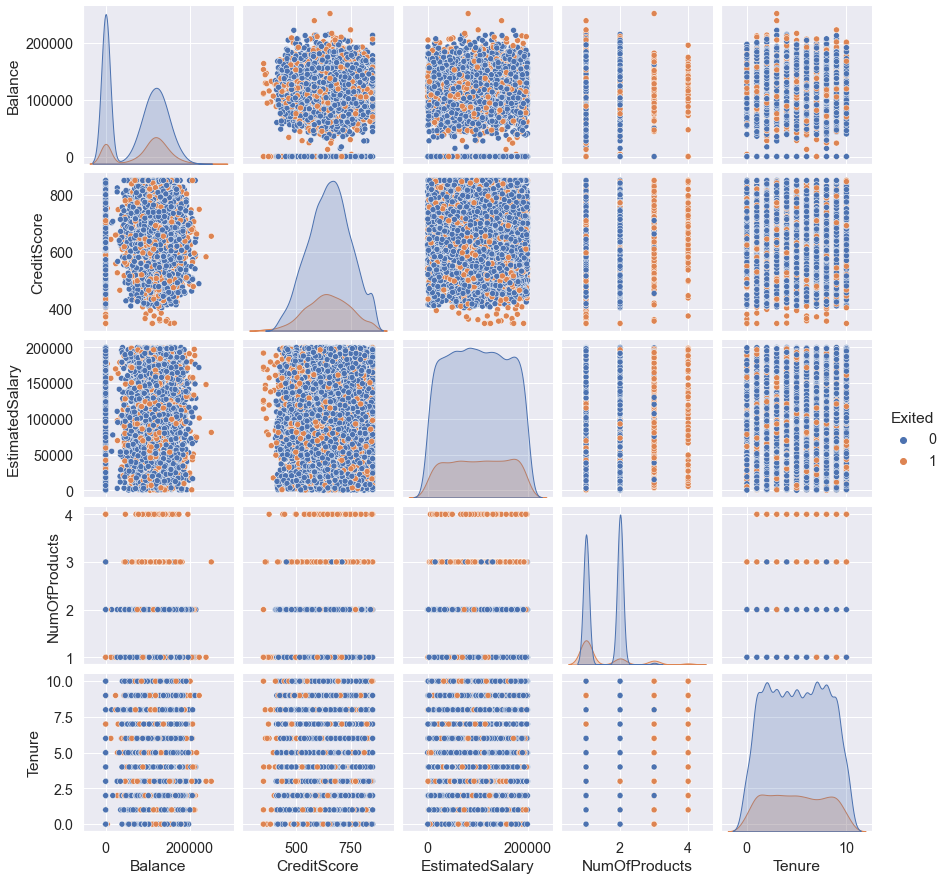

In [11]:
plt.figure(figsize = (4,4))
sns.pairplot(data = df[["Balance","CreditScore","EstimatedSalary","NumOfProducts","Tenure","Exited"]],hue = "Exited")

## Descriptive Statistics on the dataset.

In [12]:
df = pd.DataFrame(df)
print(df.sum())

CreditScore                                                  6505288
Geography          FranceSpainFranceFranceSpainSpainFranceGermany...
Gender             FemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMa...
Age                                                           389218
Tenure                                                         50128
Balance                                                 764858892.88
NumOfProducts                                                  15302
HasCrCard                                                       7055
IsActiveMember                                                  5151
EstimatedSalary                                        1000902398.81
Exited                                                          2037
dtype: object


In [13]:
print("****Sum Value****")
print(df.sum(1))
print("---------------------------")
print("****Product Value****")
print(df.prod())
print("---------------------------")

****Sum Value****
0       102015.88
1       197002.44
2       274149.37
3        94567.63
4       205492.92
          ...    
9995     97088.64
9996    159633.38
9997     42840.58
9998    168784.83
9999    169159.57
Length: 10000, dtype: float64
---------------------------
****Product Value****
CreditScore        0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    inf
Exited             0.0
dtype: float64
---------------------------


C:\Users\Ashwin kumar\anaconda3\lib\site-packages\numpy\core\_methods.py:51: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


## Handling the Missing Values

In [14]:
#Checking values are null
df.isnull()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False


In [15]:
#Checking values are not null
df.notnull()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
9995,True,True,True,True,True,True,True,True,True,True,True
9996,True,True,True,True,True,True,True,True,True,True,True
9997,True,True,True,True,True,True,True,True,True,True,True
9998,True,True,True,True,True,True,True,True,True,True,True


## Find the outliers and replace the outliers

C:\Users\Ashwin kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Balance'>

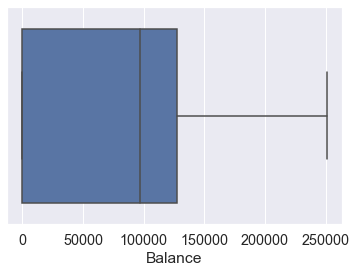

In [16]:
sns.boxplot(df["Balance"])

In [17]:
print(np.where(df["Balance"]>100000))

(array([   2,    4,    5, ..., 9987, 9993, 9999], dtype=int64),)


In [21]:
from scipy import stats

z = np.abs(stats.zscore(df["EstimatedSalary"]))
print(z)

[0.02188649 0.21653375 0.2406869  ... 1.00864308 0.12523071 1.07636976]


## Check for Categorical columns and perform encoding.

In [22]:
from sklearn.preprocessing import LabelEncoder
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [23]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [26]:
encoding = LabelEncoder()
df["Gender"] = encoding.fit_transform(df.iloc[:,1].values)
print(df)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France       0   42       2       0.00              1   
1             608     Spain       2   41       1   83807.86              1   
2             502    France       0   42       8  159660.80              3   
3             699    France       0   39       1       0.00              2   
4             850     Spain       2   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France       0   39       5       0.00              2   
9996          516    France       0   35      10   57369.61              1   
9997          709    France       0   36       7       0.00              1   
9998          772   Germany       1   42       3   75075.31              2   
9999          792    France       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0   

## Split the data into dependent and independent variables.

In [27]:
print("******Dependent Variables******")
X = df.iloc[:,1:4]
print(X)
print("--------------------------------")
print("******Independent Variables******")
Y = df.iloc[:,4]
print(Y)
print("---------------------------------")

******Dependent Variables******
     Geography  Gender  Age
0       France       0   42
1        Spain       2   41
2       France       0   42
3       France       0   39
4        Spain       2   43
...        ...     ...  ...
9995    France       0   39
9996    France       0   35
9997    France       0   36
9998   Germany       1   42
9999    France       0   28

[10000 rows x 3 columns]
--------------------------------
******Independent Variables******
0        2
1        1
2        8
3        1
4        2
        ..
9995     5
9996    10
9997     7
9998     3
9999     4
Name: Tenure, Length: 10000, dtype: int64
---------------------------------


## Split the data into training & testing

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 4, random_state = 4)
x_train

,const,EstimatedSalary
2558,1.0,137903.54
7642,1.0,121765.00
8912,1.0,109470.34
3319,1.0,2923.61
6852,1.0,7312.25
...,...,...
456,1.0,7666.73
6017,1.0,9085.00
709,1.0,147794.63
8366,1.0,102515.42


In [30]:
x_test

,const,EstimatedSalary
1603,1.0,23305.85
8713,1.0,41248.80
4561,1.0,143317.42
6600,1.0,174123.16


In [31]:
y_test

1603    576
8713    786
4561    562
6600    505
Name: CreditScore, dtype: int64